### Convolutional neural networks can be used for Computer vision(detecting pattern in visual data) 

**NOTE:** In deep learning, many different kind of model architectures can be used for different problems.

## What we are going to cover 
Specifically, we are going to go through the following with TensorFlow: 
- Getting a dataset to work with 
- Architecture of a convolutional neural network 
- A quick end-to-end example (what we are working towards)
Steps in modelling for binary image classification with CNNs 
  - Becomiong one with data 
  - Preparing data for modelling 
  - Creating a CNN model (starting with a baseline) 
  - Fitting a model (getting it to find patterns in the data) 
  - Evaluating a model 
  - Improving a model 
  - Making a prediction with a trained model 
- Steps in modelling for multi-class image classification with CNNs 
- Same as above (but this time with a different dataset)

## **Get the data**
The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier

In [ ]:
import zipfile 

# download zip file of pizza steak images 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip  



--2023-01-04 00:44:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.128, 142.250.97.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   184MB/s    in 0.6s    

2023-01-04 00:44:52 (184 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# unzip the downloaded file 
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

### Inspect the data 
- Visualize and scan the folders

In [ ]:
# the folder directories
!ls pizza_steak

test  train


- we have the test and train folder

In [ ]:
# the inside of the train folder
!ls pizza_steak/train/

pizza  steak


In [ ]:
# the inside of the steak directory 
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

- We've got a while bunch of images here

### Walk through the folder to get some informationsw 

In [ ]:
import os 

# walk through pizza_steak directory and list number of files 
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'Theare are {len(dirnames)} directories and {len(filenames)} images in {dirpath}') 

Theare are 2 directories and 0 images in pizza_steak
Theare are 2 directories and 0 images in pizza_steak/train
Theare are 0 directories and 750 images in pizza_steak/train/pizza
Theare are 0 directories and 750 images in pizza_steak/train/steak
Theare are 2 directories and 0 images in pizza_steak/test
Theare are 0 directories and 250 images in pizza_steak/test/pizza
Theare are 0 directories and 250 images in pizza_steak/test/steak


In [ ]:
# Another way to find out how many images are in a file 
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
# Another way to find out how many images are in a file 
num_steak_images_test = len(os.listdir('pizza_steak/test/steak'))
num_steak_images_test

250

In [ ]:
'''
Get the class names (programmatically, 
this is much more helpful with a longer list of classes)
''' 
import pathlib 
import numpy as np 
# # turn our training path into a Python path
data_dir = pathlib.Path('pizza_steak/train/') 

# created a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


### Visualize some of the data

In [ ]:
# view an image 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import random 

def view_random_image(target_dir, target_class): 
  # set up target directory (we will viw images from here)
  target_folder = target_dir+target_class 

  # Get a random image path 
  random_image = random.sample(os.listdir(target_folder), 1) 

  # read in the image (covert the image to tensor)
  img = mpimg.imread(target_folder + '/' + random_image[0])

  # plot the image using matplotlib 
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off'); 

  # show shape of image 
  print(f'Image shape: {img.shape}')

  return img

Image shape: (384, 512, 3)


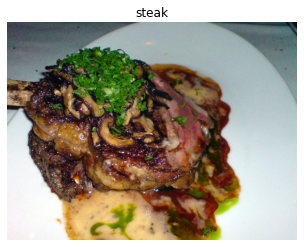

In [ ]:
# view a steak random image from the training dataset 
random_img = view_random_image(target_dir = 'pizza_steak/train/', 
                        target_class = 'steak')

Image shape: (512, 384, 3)


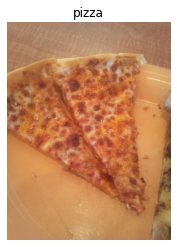

In [ ]:
# view a pizza random image from the training dataset 
random_img2 = view_random_image(target_dir = 'pizza_steak/train/', 
                        target_class = 'pizza')

In [ ]:
# view the image tensor
random_img

array([[[ 69,  80,  86],
        [ 63,  74,  78],
        [ 63,  68,  74],
        ...,
        [ 12,  18,  18],
        [  4,  19,  14],
        [  5,  22,  14]],

       [[ 16,  91,  84],
        [ 23,  85,  80],
        [ 43,  77,  79],
        ...,
        [  6,  14,  16],
        [  3,  15,  13],
        [  4,  19,  14]],

       [[ 44,  71,  88],
        [ 46,  72,  87],
        [ 55,  71,  84],
        ...,
        [  4,  15,  19],
        [  4,  14,  16],
        [  7,  15,  17]],

       ...,

       [[245, 239, 241],
        [247, 236, 240],
        [247, 235, 239],
        ...,
        [225, 223, 228],
        [223, 222, 227],
        [222, 223, 228]],

       [[243, 239, 240],
        [245, 236, 239],
        [247, 235, 239],
        ...,
        [225, 223, 228],
        [224, 221, 230],
        [222, 222, 230]],

       [[240, 238, 239],
        [243, 237, 239],
        [247, 236, 240],
        ...,
        [227, 222, 229],
        [225, 222, 231],
        [223, 223, 233]]

In [ ]:
# view the image shape 
# returns (width, height, colour channels)
random_img.shape

(384, 512, 3)

- thr width and height varies per image but the color channel is always 3(different values for Red, Green, Blue)

In [ ]:
random_img.max(), random_img.min()

(255, 0)

- image values are always between 0 and 255 

- For example, a pixel with a value red=0, green=0, blue=255 will look very blue 

- We will Normalize(sclae) the values to between 0 and 1, as Neural networks prefer this for quick Gradient descent.

In [ ]:
# Normalize the values
random_img/255

array([[[0.27058824, 0.31372549, 0.3372549 ],
        [0.24705882, 0.29019608, 0.30588235],
        [0.24705882, 0.26666667, 0.29019608],
        ...,
        [0.04705882, 0.07058824, 0.07058824],
        [0.01568627, 0.0745098 , 0.05490196],
        [0.01960784, 0.08627451, 0.05490196]],

       [[0.0627451 , 0.35686275, 0.32941176],
        [0.09019608, 0.33333333, 0.31372549],
        [0.16862745, 0.30196078, 0.30980392],
        ...,
        [0.02352941, 0.05490196, 0.0627451 ],
        [0.01176471, 0.05882353, 0.05098039],
        [0.01568627, 0.0745098 , 0.05490196]],

       [[0.17254902, 0.27843137, 0.34509804],
        [0.18039216, 0.28235294, 0.34117647],
        [0.21568627, 0.27843137, 0.32941176],
        ...,
        [0.01568627, 0.05882353, 0.0745098 ],
        [0.01568627, 0.05490196, 0.0627451 ],
        [0.02745098, 0.05882353, 0.06666667]],

       ...,

       [[0.96078431, 0.9372549 , 0.94509804],
        [0.96862745, 0.9254902 , 0.94117647],
        [0.96862745, 0

- 1. Hyperparameter/Layer type	
- 2. What does it do?	
- 3. Typical values

- 1. Input image(s)	
- 2. Target images you'd like to discover patterns in	
- 3. Whatever you can take a photo (or video) of

1. Input layer	
2. Takes in target images and preprocesses them for further layers	
3. input_shape = [batch_size, image_height, image_width, color_channels]

1. Convolution layer	
2. Extracts/learns the most important features from target images	
3. Multiple, can create with tf.keras.layers.ConvXD (X can be multiple values)

1. Hidden activation	
2. Adds non-linearity to learned features (non-straight lines)	
3. Usually ReLU (tf.keras.activations.relu)

1. Pooling layer	
2. Reduces the dimensionality of learned image features	
3. Average (tf.keras.layers.AvgPool2D) or Max (tf.keras.layers.MaxPool2D)

1. Fully connected layer	
2. Further refines learned features from convolution layers	
3. tf.keras.layers.Dense

1. Output layer	
2. Takes learned features and outputs them in shape of target labels	
3. output_shape = [number_of_classes] (e.g. 3 for pizza, steak or sushi)

1. Output activation	
2. Adds non-linearities to output layer
3. tf.keras.activations.sigmoid (binary classification) or tf.keras.activations.softmax

### Build a model

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# set the seed 
tf.random.set_seed(42)

'''
Preprocess data (get all of the pixel values 
between 1 and 0, also called scaling/normalization)
''' 
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255) 

# set up train and test directories 
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

# import data from directories and turn it to batches 
train_data = train_datagen.flow_from_directory(train_dir, 
                                               batch_size = 32, # number of images to process at a time
                                               target_size = (224, 224), # convert all images to be 224 x 224
                                               class_mode = 'binary', # type of problem we're working on
                                               seed = 42) 

valid_data = valid_datagen.flow_from_directory(test_dir, 
                                               batch_size = 32, 
                                               target_size = (224, 224), 
                                               class_mode = 'binary', 
                                               seed = 42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, 
                           kernel_size = 3, # can also (3, 3)
                           activation = 'relu', 
                           input_shape = (224, 224, 3)), # first layer 
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'), 
    tf.keras.layers.MaxPool2D(pool_size = 2, # pool size can also be (2, 2)
                              padding = 'valid'), # padding can also be 'same 
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'), # # activation='relu' == tf.keras.layers.Activations(tf.nn.relu) 
    tf.keras.layers.MaxPool2D(2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1, activation = 'sigmoid') # binary activation output
]) 

# compile the model 
model_1.compile(loss = 'binary_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

# Fit the model 
history_1 = model_1.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch = len(train_data), 
                        validation_data = valid_data, 
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 207ms/step - loss: 0.5992 - accuracy: 0.6593 - val_loss: 0.4663 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4287 - accuracy: 0.7987 - val_loss: 0.3472 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4120 - accuracy: 0.8193 - val_loss: 0.4060 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.3702 - accuracy: 0.8480 - val_loss: 0.3412 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3200 - accuracy: 0.8753 - val_loss: 0.4328 - val_accuracy: 0.8000


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29160)             0

### Build an ANN model to classify the image

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 1.5593 - accuracy: 0.5147 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000


- Our model ran but it doesn't seem like it learned anything. 
- It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


- One of the most noticeable things here is the much larger number of parameters in model_2 vs model_1 
- model_2 has 602,116 trainable paramters while model_1 has 31,261. 
- Despite the huge difference, model_1 still outperforms model_2 
- **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** 
- So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different features in an image.

### Binary Classification: Let's break it down

We just went through a whirlwind of steps:
  1. Become one with the data (visualize, visualize, visualize...)
Preprocess the data (prepare it for a model)
  2. Create a model (start with a baseline)
  3. Fit the model
  4. Evaluate the model
  5. Adjust different parameters and improve model (try to beat your baseline)
  6. Repeat until satisfied
Let's step through each.

### Import and become one with your data
  - Visualize at least 10 - 100 samples of the data

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


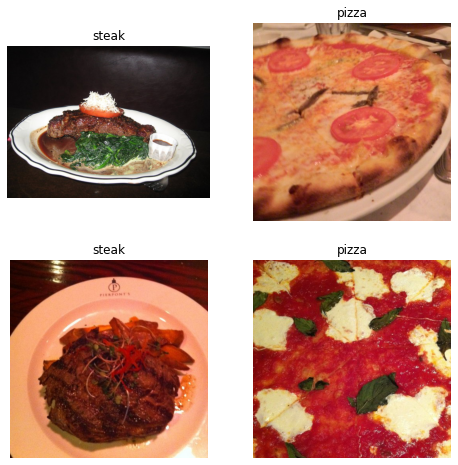

In [ ]:
# use view_random_image function 
plt.figure(figsize = (8, 8))
plt.subplot(2, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(2, 2, 2)
steak_img = view_random_image('pizza_steak/train/', 'pizza') 
plt.subplot(2, 2, 3)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(2, 2, 4)
steak_img = view_random_image('pizza_steak/train/', 'pizza') 

2. Preprocess the data (prepare it for a model) 
  - Define the train and test data directory paths 

In [ ]:
# define training and test directory paths 
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test'

  - turn our data into batches: create an instance of ImageDataGenerator to do this

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

In [ ]:
# create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

- The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model. 
- load the respective images from their directory using **flow_from_directory** method

In [ ]:
# turn it into batches 
train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                               target_size = (224, 224), 
                                               class_mode = 'binary', 
                                               batch_size = 32) 

test_data = test_datagen.flow_from_directory(directory = test_dir, 
                                             target_size = (224, 224), 
                                             class_mode = 'binary', 
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Some bits of explanation 
- Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.
- The target_size parameter defines the input size of our images in (height, width) format.
- The class_mode value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.
- The batch_size defines how many images will be in each batch, we've used 32 which is the same as the default.

In [ ]:
# get a sample of the training data batch 
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# get the first two images 
images[:2], images[0].shape

(array([[[[0.1254902 , 0.0509804 , 0.05882353],
          [0.12941177, 0.05490196, 0.0627451 ],
          [0.11764707, 0.04705883, 0.04705883],
          ...,
          [0.882353  , 0.85098046, 0.8000001 ],
          [0.87843144, 0.8470589 , 0.7960785 ],
          [0.87843144, 0.8470589 , 0.7960785 ]],
 
         [[0.11764707, 0.05490196, 0.05490196],
          [0.11764707, 0.05490196, 0.05490196],
          [0.11764707, 0.04705883, 0.04705883],
          ...,
          [0.87843144, 0.8470589 , 0.7960785 ],
          [0.882353  , 0.85098046, 0.8000001 ],
          [0.8862746 , 0.854902  , 0.80392164]],
 
         [[0.11764707, 0.0627451 , 0.05882353],
          [0.11764707, 0.05490196, 0.05490196],
          [0.11764707, 0.05882353, 0.04705883],
          ...,
          [0.882353  , 0.85098046, 0.8000001 ],
          [0.882353  , 0.85098046, 0.8000001 ],
          [0.8862746 , 0.854902  , 0.80392164]],
 
         ...,
 
         [[0.8196079 , 0.7803922 , 0.74509805],
          [0.82352

In [ ]:
# view the first batch of labels 
labels

array([1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.],
      dtype=float32)

### Create a model(start with a baseline) 
- In deep learning, a smaller model often refers to a model with lee layers than the state of the art(SOTA), like 3-4 layers.

In [ ]:
# make creating the model a little easier 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import Sequential

In [ ]:
# create the model (baseline: a 3 layer Convolutional Neural Networks)
model_4 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, strides = 1, padding = 'valid', 
    activation = 'relu', input_shape = (224, 224, 3)), 
    Conv2D(10, 3, activation = 'relu'), 
    Conv2D(10, 3, activation = 'relu'), 
    Flatten(),
    Dense(1, activation = 'sigmoid') # specify output shape
])

### Typical CNN structure of:

* Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output 

### Some components of Conv2D 
* The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually. 

* filters - these are the number of "feature extractors" that will be moving over our images. 

* kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract. 

* stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time. 

* padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end. 

**A feature can be considered any significant part of an image.** For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak. These features are learned by the model



In [ ]:
# compile the model 
model_4.compile(loss = 'binary_crossentropy', 
                optimizer = Adam(), 
                metrics = ['accuracy'])

In [ ]:
# Fit the model 
history_4 = model_4.fit(train_data, 
            steps_per_epoch = len(train_data), 
            epochs = 5, 
            validation_data = test_data, 
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 196ms/step - loss: 0.0481 - accuracy: 0.9860 - val_loss: 0.5158 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.0293 - accuracy: 0.9940 - val_loss: 0.4933 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 11s 224ms/step - loss: 0.0089 - accuracy: 0.9993 - val_loss: 0.8252 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 12s 254ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.7162 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 18s 379ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.7866 - val_accuracy: 0.8040


### Evaluate the model

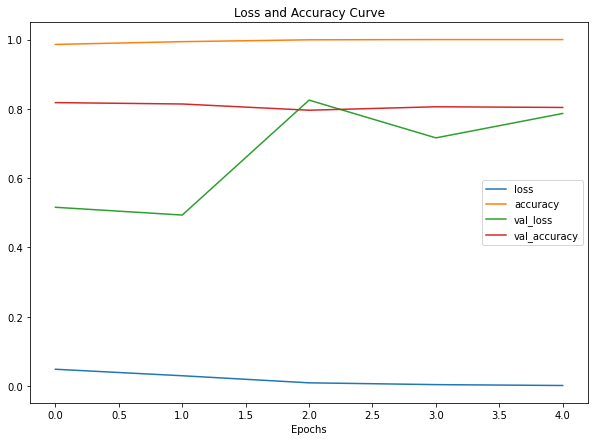

In [ ]:
# plot the training curves 
import pandas as pd 
pd.DataFrame(history_4.history).plot(figsize = (10, 7), 
                                     title = 'Loss and Accuracy Curve', 
                                     xlabel = 'Epochs')

Judging by our loss curves, it looks like our model is overfitting the training dataset. 

When a model's **validation loss** starts to **increase**, it's likely that it's overfitting the training dataset. 

**Overfitting** means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

In [ ]:
## plot the validation and trainig data separately 
def plot_loss_curves(history): 
  '''
  returns separate loss curves for trainig and validation metrics 
  ''' 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss 
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # plot accuracy 
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

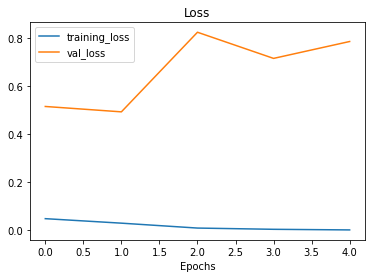

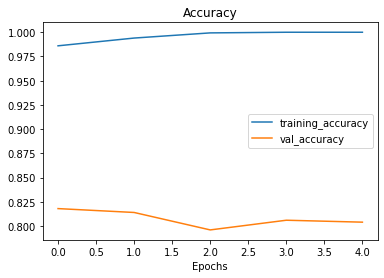

In [ ]:
# check out the loss curve of model_4 
plot_loss_curves(history_4)

* The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [ ]:
# check out our model arcitecture 
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_4 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Adjust the model parameters to remove overfitting 

Namely, we will build 2 more models 
* A ConvNet with max pooling 
* A ConvNet with max pooling and data augmentation 

modified basic CNN structure:

* Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output

In [ ]:
# create a model
model_5 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)), 
    MaxPool2D(pool_size = 2), # reduce number of features by half 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(), 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(), 
    Flatten(), 
    Dense(1, activation = 'sigmoid')
])

In [ ]:
# compile the model 
model_5.compile(loss = 'binary_crossentropy', 
                optimizer = Adam(), 
                metrics = ['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 189ms/step - loss: 0.5707 - accuracy: 0.7327 - val_loss: 0.4885 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4788 - accuracy: 0.7760 - val_loss: 0.4097 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4287 - accuracy: 0.8093 - val_loss: 0.3913 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4151 - accuracy: 0.8207 - val_loss: 0.3609 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3949 - accuracy: 0.8380 - val_loss: 0.3542 - val_accuracy: 0.8520


* Okay, it looks like our model with max pooling (model_5) is performing worse on the training set but better on the validation set.

In [ ]:
# check out model_5 architecture 
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 10)      

* **MaxPool2D** layer halfs the output shape each time. It extracts the most important features and get rid of the rest. 

* If the MaxPool2D gets too big, the model will not be able to learn anything.

* The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in model_5 and 477,431 in model_4).

### Loss and Acuuracy curves

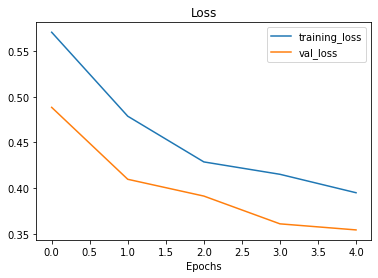

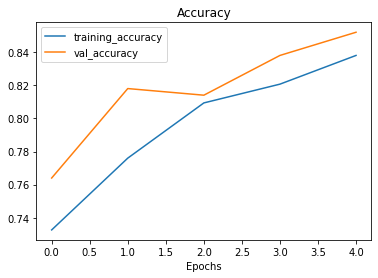

In [ ]:
# plot loss curves of model_5 
plot_loss_curves(history_5)

* We can see the training curves get a lot closer to eachother. 

### Data Augmentation: another method of preventing overfitting

In [ ]:
# create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255., 
                                             rotation_range = 20, 
                                             shear_range = 0.2, 
                                             zoom_range = 0.2, 
                                             width_shift_range = 0.2, 
                                             height_shift_range = 0.2, 
                                             horizontal_flip = True) 

# create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)

**Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.**

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


### Visualize the augmented images

In [ ]:
# get data batch samples 
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

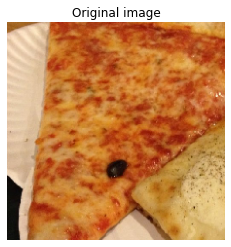

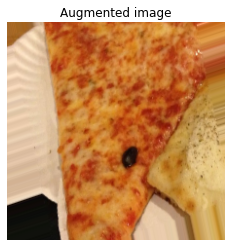

In [ ]:
# show original and augmented image 
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False);

* The augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

In [ ]:
# create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)), 
    MaxPool2D(pool_size = 2), # reduce number of features by half 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(), 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(), 
    Flatten(), 
    Dense(1, activation = 'sigmoid')
])

In [ ]:
# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 459ms/step - loss: 0.7014 - accuracy: 0.5093 - val_loss: 0.6858 - val_accuracy: 0.5300
Epoch 2/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6962 - accuracy: 0.4513 - val_loss: 0.6787 - val_accuracy: 0.5640
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6912 - accuracy: 0.5960 - val_loss: 0.6732 - val_accuracy: 0.5020
Epoch 4/5
47/47 [==============================] - 23s 485ms/step - loss: 0.6798 - accuracy: 0.5353 - val_loss: 0.6637 - val_accuracy: 0.6360
Epoch 5/5
47/47 [==============================] - 23s 494ms/step - loss: 0.6633 - accuracy: 0.5947 - val_loss: 0.6177 - val_accuracy: 0.6940


## NOTE
**Question:** Why didn't our model get very good results on the training set to begin with?

* It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.

* For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

* Since we only set shuffle=False for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting shuffle=True on future data generators.

* You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~24s per epoch vs. ~10s per epoch).

* This is because the ImageDataGenerator instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

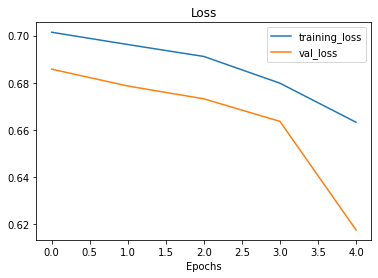

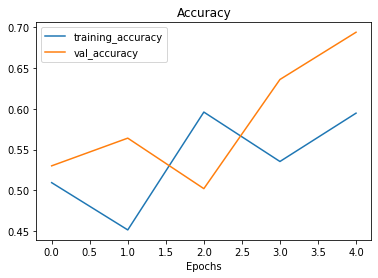

In [ ]:
# check model's performance history training on augmented data 
plot_loss_curves(history_6)

### set shuffle = True

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)
     

Found 1500 images belonging to 2 classes.


In [ ]:
# create a model (same as model_5)
model_7 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)), 
    MaxPool2D(pool_size = 2), # reduce number of features by half 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(), 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(), 
    Flatten(), 
    Dense(1, activation = 'sigmoid')
])

In [ ]:
# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # changed to shuffled augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6771 - accuracy: 0.5700 - val_loss: 0.6495 - val_accuracy: 0.5860
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6135 - accuracy: 0.6713 - val_loss: 0.5186 - val_accuracy: 0.7240
Epoch 3/5
47/47 [==============================] - 24s 515ms/step - loss: 0.5063 - accuracy: 0.7607 - val_loss: 0.4492 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 21s 451ms/step - loss: 0.4821 - accuracy: 0.7747 - val_loss: 0.3981 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4885 - accuracy: 0.7693 - val_loss: 0.4365 - val_accuracy: 0.8080


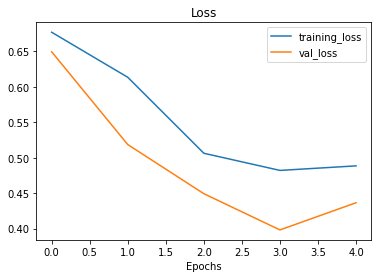

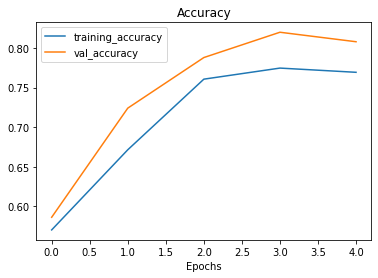

In [ ]:
# check model's performance history on shuffled augmented data
plot_loss_curves(history_7)

* model_7 how the performance on the training dataset improves almost immediately compared to model_6. 

* This is because we shuffled the training data as we passed it to the model using the parameter shuffle=True in the flow_from_directory method.

## Train the Model for Longer

In [ ]:
# create a model (same as model_5)
model_8 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)), 
    MaxPool2D(pool_size = 2), # reduce number of features by half 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(), 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(), 
    Flatten(), 
    Dense(1, activation = 'sigmoid')
])

In [ ]:
# Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled, # changed to shuffled augmented training data
                        epochs=20,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
47/47 [==============================] - 22s 459ms/step - loss: 0.3741 - accuracy: 0.8447 - val_loss: 0.2659 - val_accuracy: 0.8900
Epoch 2/20
47/47 [==============================] - 22s 475ms/step - loss: 0.3849 - accuracy: 0.8360 - val_loss: 0.3435 - val_accuracy: 0.8600
Epoch 3/20
47/47 [==============================] - 21s 454ms/step - loss: 0.3663 - accuracy: 0.8507 - val_loss: 0.2463 - val_accuracy: 0.8940
Epoch 4/20
47/47 [==============================] - 23s 489ms/step - loss: 0.4000 - accuracy: 0.8280 - val_loss: 0.2704 - val_accuracy: 0.8840
Epoch 5/20
47/47 [==============================] - 22s 458ms/step - loss: 0.3892 - accuracy: 0.8340 - val_loss: 0.3717 - val_accuracy: 0.8520
Epoch 6/20
47/47 [==============================] - 21s 456ms/step - loss: 0.3765 - accuracy: 0.8400 - val_loss: 0.2933 - val_accuracy: 0.8780
Epoch 7/20
47/47 [==============================] - 21s 453ms/step - loss: 0.3944 - accuracy: 0.8280 - val_loss: 0.3321 - val_accuracy: 0.8600

- The accuracy increased with increase in the number of epochs

### Evaluate the model

In [119]:
model_8.evaluate(test_data)

16/16 [==============================] - 2s 134ms/step - loss: 0.2184 - accuracy: 0.9140


[0.2183936983346939, 0.9139999747276306]

* 91% accuracy rate

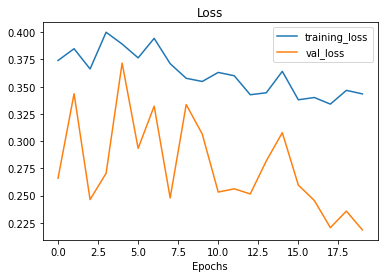

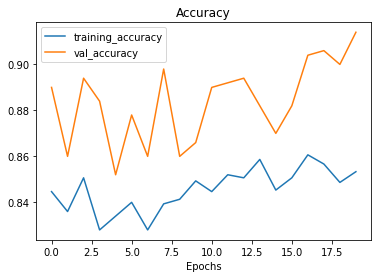

In [121]:
# loss and accuracy rate 
plot_loss_curves(history_8)

### Save model

In [122]:
# save model .h5 format 
model_8.save('pizza_steak_img_classification.h5')

### **Extra-curriculum**
1. **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3) lecture. This will give you a great intuition behind convolutional neural networks.

2. **Watch:** Deep dive on [mini-batch gradient descent](https://www.youtube.com/watch?v=-_4Zi8fCZO4) by deeplearning.ai. If you're still curious about why we use batches to train models, this technical overview covers many of the reasons why.

3. **Read:** [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/) class notes. This will give a very deep understanding of what's going on behind the scenes of the convolutional neural network architectures we're writing. 

4. **Read:** ["A guide to convolution arithmetic for deep learning"](https://arxiv.org/pdf/1603.07285.pdf). This paper goes through all of the mathematics running behind the scenes of our convolutional layers.

5. **Code practice:** [TensorFlow Data Augmentation Tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation). For a more in-depth introduction on data augmentation with TensorFlow, spend an hour or two reading through this tutorial.